In [ ]:
# default_exp datasets
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

# Testing Diffusion Flow Embedder on Circle and Swiss Roll

In [ ]:
from directed_graphs.datasets import directed_circle, directed_cylinder, directed_spiral, directed_swiss_roll
from directed_graphs.datasets import plot_directed_2d, plot_directed_3d
from directed_graphs.diffusion_flow_embedding import DiffusionFlowEmbedder
import torch
import numpy as np

In [ ]:
'''
import torch
from torch import nn
import torch.nn.functional as F
import torch_geometric
from tqdm import trange
from directed_graphs.utils import diffusion_matrix_from_graph
import numpy as np
import matplotlib.pyplot as plt
from directed_graphs.diffusion_flow_embedding import affinity_matrix_from_pointset_to_pointset

class DiffusionFlowEmbedder(torch.nn.Module):
	def __init__(self, X, flows, t = 4, sigma_graph = 0.5, sigma_embedding=0.5, embedding_dimension=2):
		"""Flow Embedding with diffusion

		Parameters
		----------
		X : torch tensor n_points x n_dim
			data matrix
		flows : torch tensor n_points x n_dim
			The flow at each point
		t : int
			Loss is computed with the diffusion operator powered to this number
		sigma in [0,1]
			Kernel bandwidth in the embedding
		"""
		# initialize parameters
		super(DiffusionFlowEmbedder, self).__init__()
		self.X = X
		self.ground_truth_flows = flows
		self.t = t
		self.sigma_embedding = sigma_embedding
		self.sigma_graph = sigma_graph
		self.nnodes = X.shape[0]
		self.data_dimension = X.shape[1]
		self.losses = []
		self.embedding_dimension = embedding_dimension
		# Compute P^t of the graph, the powered diffusion matrix
		# TODO: This can be optimized using landmarks, etc. For now it's straight sparse matrix multiplication
		# TODO: Migrate to a specialized function for dataset affinity calculation, with automatic kernel bandwidth selection, and the like
		self.P_graph = affinity_matrix_from_pointset_to_pointset(X,X,flows,sigma=sigma_graph)
		self.P_graph_t = torch.matrix_power(self.P_graph,self.t)
		# Flow field
		self.FlowArtist = nn.Sequential(nn.Linear(2, 10),
		                       nn.ReLU(),
		                       nn.Linear(10, 10),
		                       nn.ReLU(),
		                       nn.Linear(10, 2))
		# Autoencoder to embed the points into a low dimension
		self.encoder = nn.Sequential(nn.Linear(self.data_dimension, 100),
															nn.ReLU(),
															nn.Linear(100, 10),
															nn.ReLU(),
															nn.Linear(10, self.embedding_dimension))
		self.decoder = nn.Sequential(nn.Linear(self.embedding_dimension, 10),
															nn.ReLU(),
															nn.Linear(10, 100),
															nn.ReLU(),
															nn.Linear(100, self.data_dimension))
		# training ops
		self.KLD = nn.KLDivLoss(reduction='batchmean',log_target=False)
		self.MSE = nn.MSELoss()
		self.optim = torch.optim.Adam(self.parameters())
									

	def compute_embedding_P(self):
		A = affinity_matrix_from_pointset_to_pointset(self.embedded_points,self.embedded_points,flows = self.FlowArtist(self.embedded_points), sigma = self.sigma_embedding)
		# flow
		self.P_embedding = torch.diag(1/A.sum(axis=1)) @ A
		# power it
		self.P_embedding_t = torch.matrix_power(self.P_embedding,self.t)

	def loss(self):
		self.embedded_points = self.encoder(self.X)
		# compute embedding diffusion matrix
		self.compute_embedding_P()
		# compute autoencoder loss
		X_reconstructed = self.decoder(self.embedded_points)
		reconstruction_loss = self.MSE(X_reconstructed, self.X)
		# take KL divergence between it and actual P
		log_P_embedding_t = torch.log(self.P_embedding_t)
		diffusion_loss = self.KLD(log_P_embedding_t,self.P_graph_t)
		cost = diffusion_loss + reconstruction_loss
		# print(f"cost is KLD {diffusion_loss} with recon {reconstruction_loss}")
		self.losses.append([diffusion_loss,reconstruction_loss])
		return cost

	def visualize_points(self, labels):
		# controls the x and y axes of the plot
		# linspace(min on axis, max on axis, spacing on plot -- large number = more field arrows)
		minx = min(self.embedded_points[:,0].detach().cpu().numpy())-1
		maxx = max(self.embedded_points[:,0].detach().cpu().numpy())+1
		miny = min(self.embedded_points[:,1].detach().cpu().numpy())-1
		maxy = max(self.embedded_points[:,1].detach().cpu().numpy())+1
		x, y = np.meshgrid(np.linspace(minx,maxx,20),np.linspace(miny,maxy,20))
		x = torch.tensor(x,dtype=float).cpu()
		y = torch.tensor(y,dtype=float).cpu()
		xy_t = torch.concat([x[:,:,None],y[:,:,None]],dim=2).float().to('cuda')
		uv = self.FlowArtist(xy_t).detach()
		u = uv[:,:,0].cpu()
		v = uv[:,:,1].cpu()
		

		# quiver 
		# 	plots a 2D field of arrows
		# 	quiver([X, Y], U, V, [C], **kw); 
		# 	X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
		
		sc = plt.scatter(self.embedded_points[:,0].detach().cpu(),self.embedded_points[:,1].detach().cpu(), c=labels)
		plt.quiver(x,y,u,v)
		plt.legend(labels = set(labels))
		# Display all open figures.
		plt.show()


	def fit(self,n_steps = 1000):
		# train Flow Embedder on the provided graph
		self.train()
		for step in trange(n_steps):
			self.optim.zero_grad()
			# compute loss
			loss = self.loss()
			# print("loss is ",loss)
			# compute gradient and step backwards
			loss.backward()
			self.optim.step()
			# TODO: Criteria to automatically end training
		print("Exiting training with loss ",loss)
		return self.embedded_points
'''

'\nimport torch\nfrom torch import nn\nimport torch.nn.functional as F\nimport torch_geometric\nfrom tqdm import trange\nfrom directed_graphs.utils import diffusion_matrix_from_graph\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom directed_graphs.diffusion_flow_embedding import affinity_matrix_from_pointset_to_pointset\n\nclass DiffusionFlowEmbedder(torch.nn.Module):\n\tdef __init__(self, X, flows, t = 4, sigma_graph = 0.5, sigma_embedding=0.5, embedding_dimension=2):\n\t\t"""Flow Embedding with diffusion\n\n\t\tParameters\n\t\t----------\n\t\tX : torch tensor n_points x n_dim\n\t\t\tdata matrix\n\t\tflows : torch tensor n_points x n_dim\n\t\t\tThe flow at each point\n\t\tt : int\n\t\t\tLoss is computed with the diffusion operator powered to this number\n\t\tsigma in [0,1]\n\t\t\tKernel bandwidth in the embedding\n\t\t"""\n\t\t# initialize parameters\n\t\tsuper(DiffusionFlowEmbedder, self).__init__()\n\t\tself.X = X\n\t\tself.ground_truth_flows = flows\n\t\tself.t = t\n\t\ts

In [ ]:
if torch.__version__[:4] == "1.13":
	device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
else:
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Flat Circle

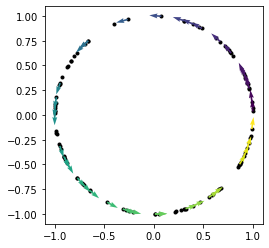

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1)
plot_directed_2d(X, flow, labels)

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

100%|██████████| 2000/2000 [00:29<00:00, 68.01it/s]

Exiting training with loss  tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/quiver.py:633: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


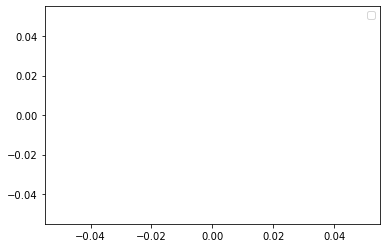

In [ ]:
dfe.visualize_points(labels)

## Tilted Circle

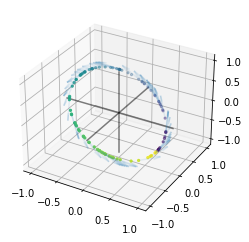

In [ ]:
X, flow, labels = directed_circle(num_nodes=100, radius=1, ytilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

100%|██████████| 2000/2000 [00:27<00:00, 72.96it/s]

Exiting training with loss  tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


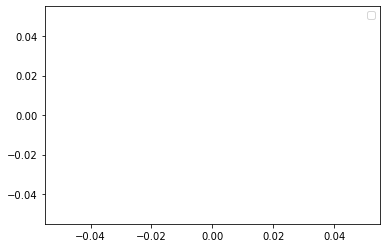

In [ ]:
dfe.visualize_points(labels)

## Cylinder

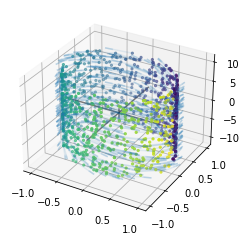

In [ ]:
X, flow, labels = directed_cylinder(num_nodes=1000, radius=1, height=20, xtilt=np.pi/4, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

100%|██████████| 2000/2000 [00:27<00:00, 71.92it/s]

Exiting training with loss  tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


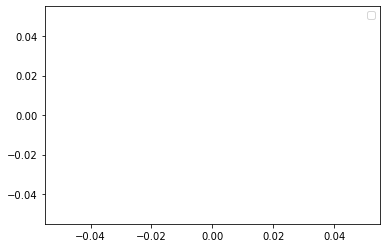

In [ ]:
dfe.visualize_points(labels)

## Flat Spiral

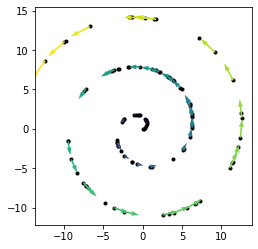

In [ ]:
X, flow, labels = directed_spiral(num_nodes=100, num_spirals=2.5, radius=1)
plot_directed_2d(X, flow, labels)

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

100%|██████████| 2000/2000 [00:26<00:00, 74.14it/s]

Exiting training with loss  tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


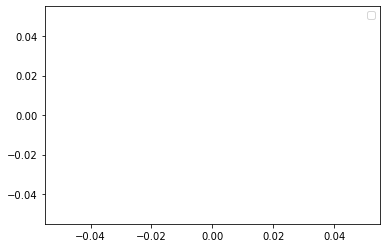

In [ ]:
dfe.visualize_points(labels)

## Tilted Spiral

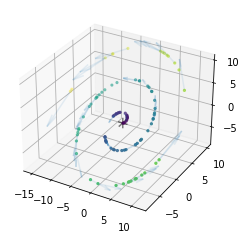

In [ ]:
X, flow, labels = directed_spiral(num_nodes=100, num_spirals=2.5, radius=1, xtilt=np.pi/4)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

100%|██████████| 2000/2000 [00:26<00:00, 74.73it/s]

Exiting training with loss  tensor(nan, device='cuda:0', grad_fn=<AddBackward0>)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


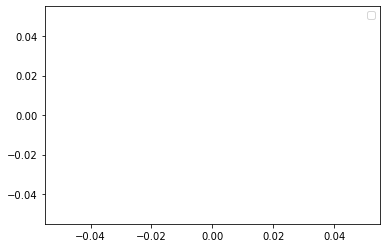

In [ ]:
dfe.visualize_points(labels)

## Swiss Roll

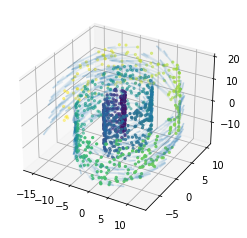

In [ ]:
X, flow, labels = directed_swiss_roll(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=np.pi/4, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

In [ ]:
dfe.visualize_points(labels)

In [ ]:
import phate
phate_operator = phate.PHATE(n_components = 2, knn=5, decay=20, t=150)
phate_X = phate_operator.fit_transform(X.cpu())
phate.plot.scatter2d(phate_X, c=labels)